In [ ]:
# # get the dead channels (state the path to the diagnostic file and number of planes in your run)
# def channels_diagnostics(path_to_diagnostic_file, number_of_planes):
    
#     # open the diagnostic file
#     infile = uproot.open(path_to_diagnostic_file)

#     # get the isgood, plane_ID and channel_ID data
#     isgood = infile['Diagnostics;1']['BadChannelResults']['isGood'].array()
#     plane_ID = infile['Diagnostics;1']['BadChannelResults']['planeID'].array()
#     channel_ID = infile['Diagnostics;1']['BadChannelResults']['channelID'].array()

#     # attach channels to planes
#     Y, X = divmod(channel_ID, 20)
#     XY = ak.zip({ "X":X, "Y":Y})
#     all_channels = ak.zip({ "plane_ID":plane_ID, "channel_ID":XY})

#     # get the good and bad channels
#     bad_channels = all_channels[~isgood]

#     # create the matrices with the bad channels
#     matrices = []
#     for i in range(number_of_planes):
#         bad_channel_matrix = np.zeros((13,20))

#         # bad channels in the i'th plane
#         bad_channels_plane_i = bad_channels[bad_channels.plane_ID == i].channel_ID

#         # update the entries at the dead channels as 1
#         for ch in bad_channels_plane_i:
#             x = ch.X
#             y = ch.Y
#             bad_channel_matrix[-1-y][x] = 1

#         matrices.append(bad_channel_matrix)

#     # plot
#     fig, axes = plt.subplots(2, 4, figsize=(16, 10))  # larger figure
#     axes = axes.ravel()

#     # Generate pad numbering (13×20)
#     pad_numbers = np.arange(260).reshape(13, 20)

#     for idx, (ax, mat) in enumerate(zip(axes, matrices)):
        
#         # Plot heatmap
#         sns.heatmap(
#             mat,
#             ax=ax,
#             cmap="coolwarm",
#             square=False,
#             annot = pad_numbers[::-1],   # write pad numbers
#             fmt="d",
#             cbar = False,
#             annot_kws={"size": 6},
#             linewidths=0.3,
#             linecolor="black"
#         )

#         # title for each plane
#         ax.set_title(f"Plane {idx}", fontsize=14)

#         # add the gap seperator
#         ax.axvline( x=12, color="white", linestyle="--", linewidth=1.2)

#         # X ticks (0–19)
#         ax.set_xticks(np.arange(20) + 0.5)
#         ax.set_xticklabels(np.arange(20), rotation = 55)

#         # Y ticks (0–12)
#         ax.set_yticks(np.arange(13) + 0.5)
#         ax.set_yticklabels(np.arange(12, -1, -1), rotation = 0)  # bottom = 0
    
#     fig.suptitle("Bad Channels (Red). Pad 0 is Closest to the Beam", fontsize = 20)
#     plt.tight_layout()
#     plt.show()


<>:94: SyntaxWarning: invalid escape sequence '\T'
<>:94: SyntaxWarning: invalid escape sequence '\T'
C:\Users\bents\AppData\Local\Temp\ipykernel_4776\1332024946.py:94: SyntaxWarning: invalid escape sequence '\T'
  path = "TB_FIRE\TB_reco\TB_FIRE_1362_raw_reco.root"


we got the data


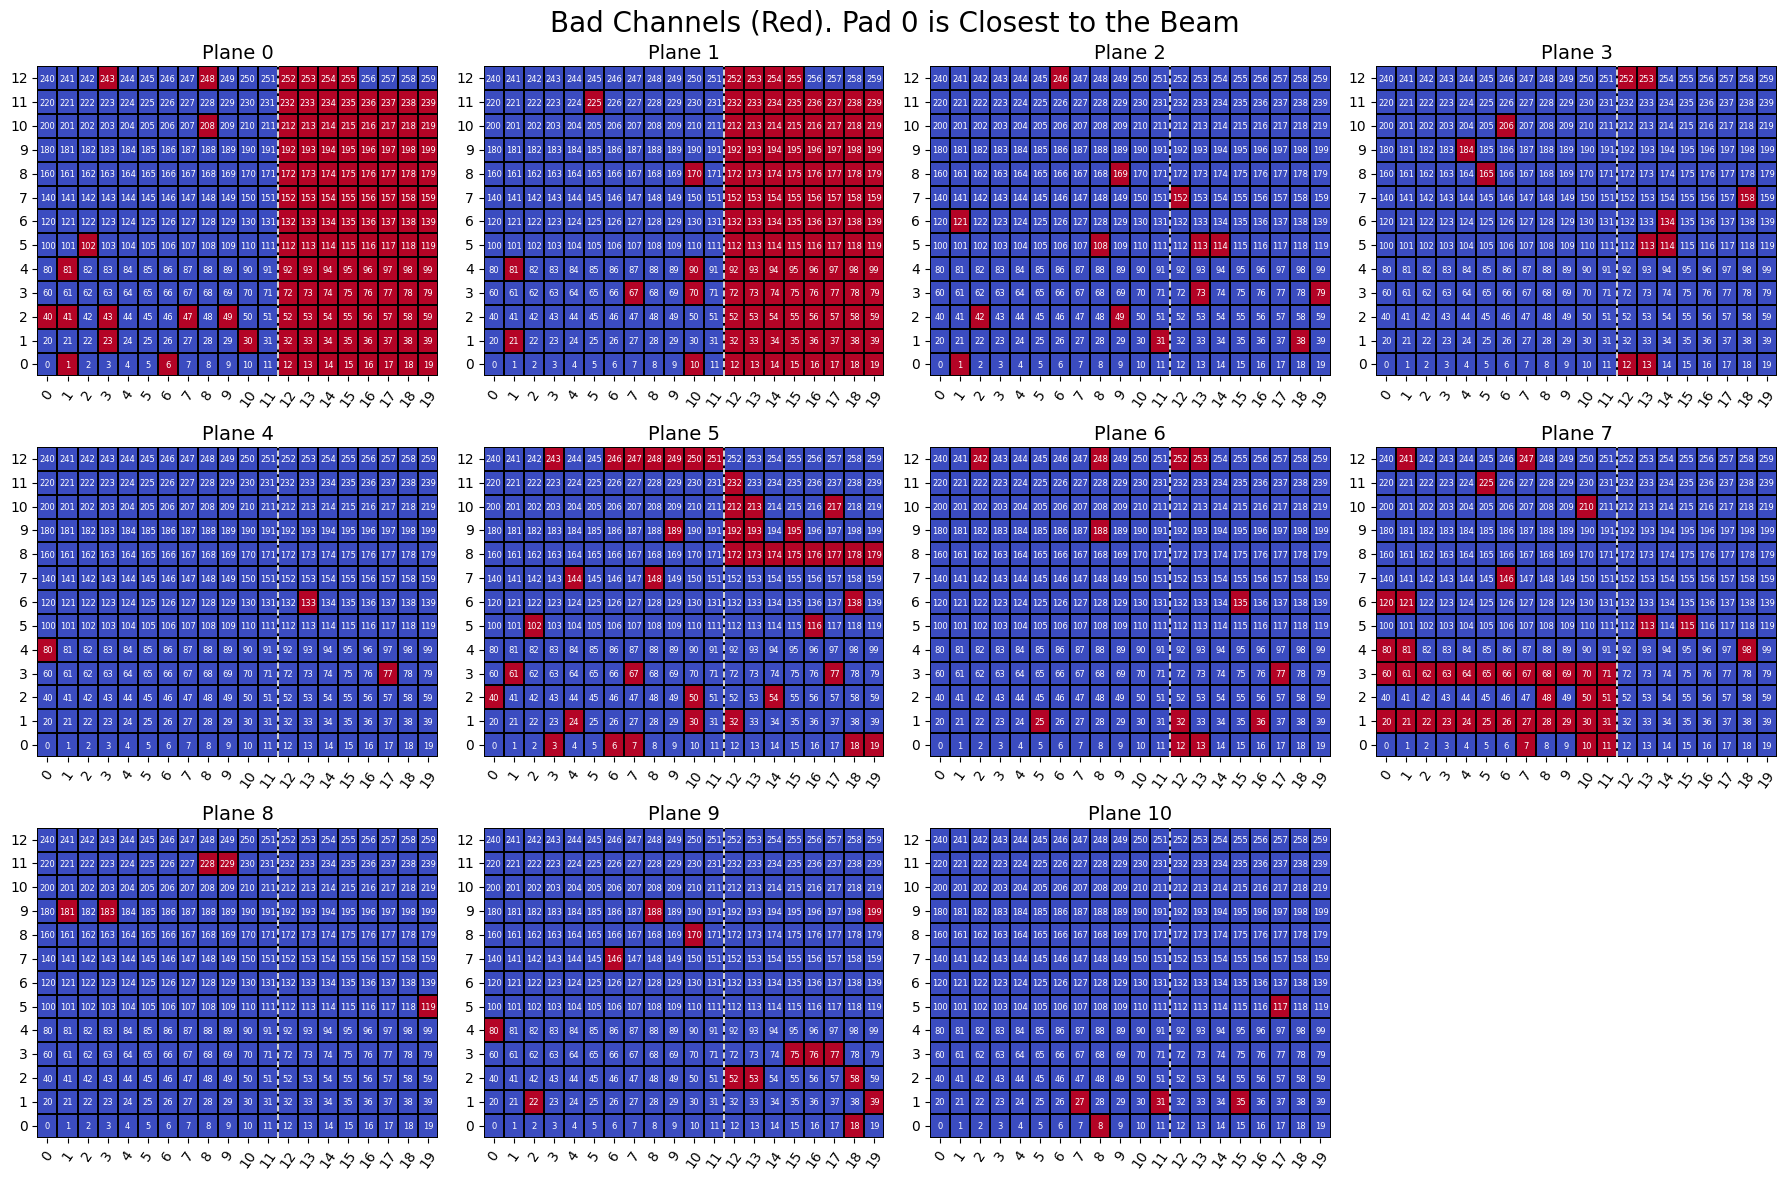

In [26]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# get the dead channels (state the path to the diagnostic file and number of planes in your run)
def channels_diagnostics(path_to_file, number_of_planes):
    
    # open the diagnostic file
    infile = uproot.open(path_to_file)

    # get the isgood, plane_ID and channel_ID data for 8 planes
    if number_of_planes < 10:
        bad_channels_result = infile['Diagnostics;1']['BadChannelResults']
        plots_rows = 2
    
    # get the isgood, plane_ID and channel_ID data for 8 planes
    if number_of_planes > 10:
        bad_channels_result = infile['BadChannelResults']
        plots_rows = 3
        
    isgood = bad_channels_result['isGood'].array()
    plane_ID = bad_channels_result['planeID'].array()
    channel_ID = bad_channels_result['channelID'].array()
    
    print("we got the data")

    # attach channels to planes
    Y, X = divmod(channel_ID, 20)
    XY = ak.zip({ "X":X, "Y":Y})
    all_channels = ak.zip({ "plane_ID":plane_ID, "channel_ID":XY})

    # get the good and bad channels
    bad_channels = all_channels[~isgood]

    # create the matrices with the bad channels
    matrices = []
    for i in range(number_of_planes):
        bad_channel_matrix = np.zeros((13,20))

        # bad channels in the i'th plane
        bad_channels_plane_i = bad_channels[bad_channels.plane_ID == i].channel_ID

        # update the entries at the dead channels as 1
        for ch in bad_channels_plane_i:
            x = ch.X
            y = ch.Y
            bad_channel_matrix[-1-y][x] = 1

        matrices.append(bad_channel_matrix)

    # plot
    # fig, axes = plt.subplots(2, 4, figsize=(16, 10))  # larger figure
    fig, axes = plt.subplots(plots_rows, 4, figsize=(18, 12))  # larger figure
    axes = axes.ravel()

    # Generate pad numbering (13×20)
    pad_numbers = np.arange(260).reshape(13, 20)

    for idx, (ax, mat) in enumerate(zip(axes, matrices)):
        
        # Plot heatmap
        sns.heatmap(
            mat,
            ax=ax,
            cmap="coolwarm",
            square=False,
            annot = pad_numbers[::-1],   # write pad numbers
            fmt="d",
            cbar = False,
            annot_kws={"size": 6},
            linewidths=0.3,
            linecolor="black"
        )

        # title for each plane
        ax.set_title(f"Plane {idx}", fontsize=14)

        # add the gap seperator
        ax.axvline( x=12, color="white", linestyle="--", linewidth=1.2)

        # X ticks (0–19)
        ax.set_xticks(np.arange(20) + 0.5)
        ax.set_xticklabels(np.arange(20), rotation = 55)

        # Y ticks (0–12)
        ax.set_yticks(np.arange(13) + 0.5)
        ax.set_yticklabels(np.arange(12, -1, -1), rotation = 0)  # bottom = 0

        if len(axes) > len(matrices):
            axes[len(matrices)].set_visible(False)
    
    fig.suptitle("Bad Channels (Red). Pad 0 is Closest to the Beam", fontsize = 20)
    plt.tight_layout()
    plt.show()


# replace this with your path to the file and number of planes
path = "TB_FIRE\TB_reco\TB_FIRE_1362_raw_reco.root"
number_of_planes = 11

channels_diagnostics(path, number_of_planes)

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\bents\AppData\Local\Temp\ipykernel_4776\4070267539.py:2: SyntaxWarning: invalid escape sequence '\T'
  path = "TB_FIRE\TB_reco\TB_FIRE_1093_raw_reco_diagnostics.root"


we got the data


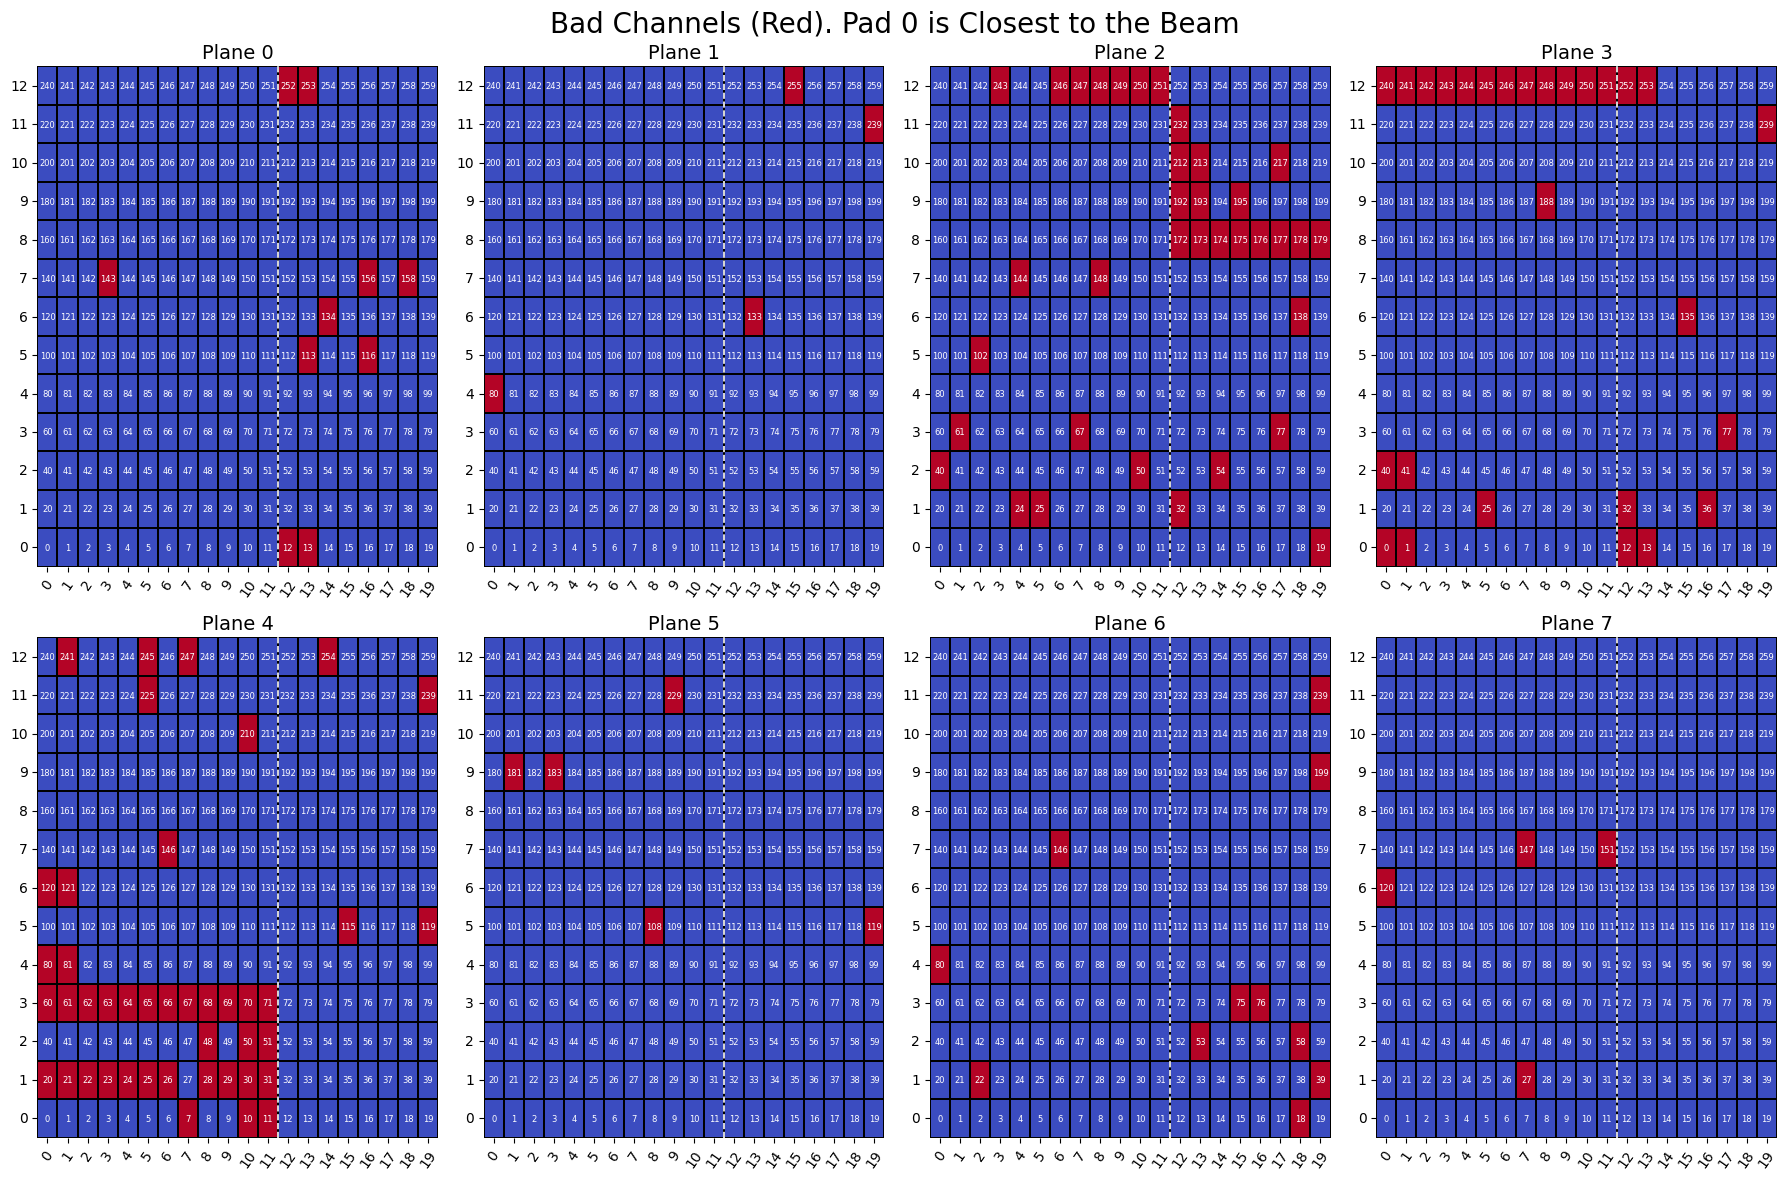

In [28]:
# replace this with your path to the file and number of planes
path = "TB_FIRE\TB_reco\TB_FIRE_1093_raw_reco_diagnostics.root"
number_of_planes = 8

channels_diagnostics(path, number_of_planes)

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\bents\AppData\Local\Temp\ipykernel_4776\3275463519.py:2: SyntaxWarning: invalid escape sequence '\T'
  path = "TB_FIRE\TB_reco\TB_FIRE_1081_raw_reco_diagnostics.root"


we got the data


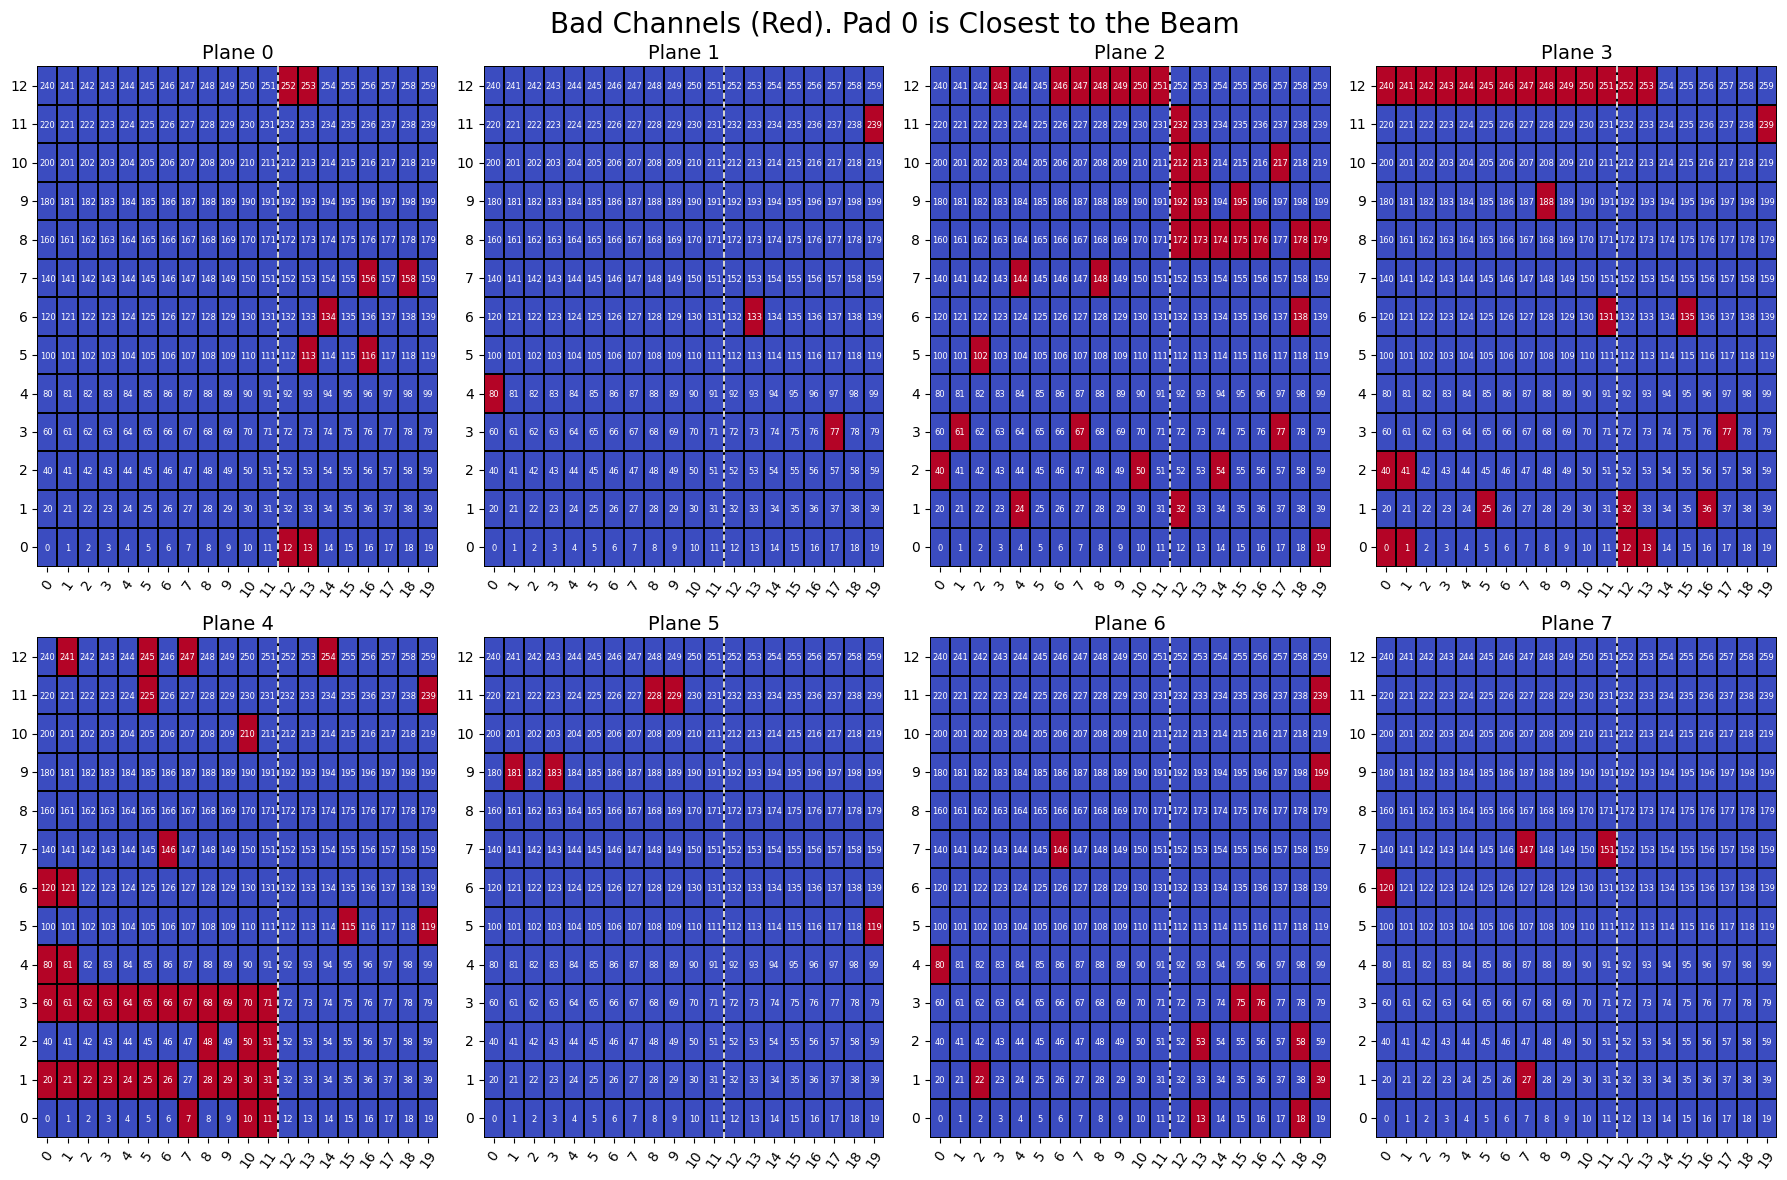

In [29]:
# replace this with your path to the file and number of planes
path = "TB_FIRE\TB_reco\TB_FIRE_1081_raw_reco_diagnostics.root"
number_of_planes = 8

channels_diagnostics(path, number_of_planes)